# Tutorial 2 - Principal Component Analysis

### Exercise 1: Create your own function for PCA.
#### The input data is represented by $X$. This function is raw and does not itself normalize the data. This function determines eigenvalues and eigenvectors of the covariance matrix of $X$.
#### Before sending $X$ to this function, do the following:
1. Subtract from mean $\boldsymbol \mu$ of each column from the column.
2. Scale each dimension of each column by $\frac{1}{\sigma}$ where $\sigma$ is the stardard deviation.

In [31]:
# This function does not normalize X.
def pca(X):
  n, m = X.shape
  # Compute covariance matrix
  C = np.dot(X.T, X) / (n-1) # when data is small, co-variance matrix is normalized by dividing by n-1.
  # Eigen decomposition
  eigen_vals, eigen_vecs = np.linalg.eig(C)
  # Project X onto PC space
  X_pca = np.dot(X, eigen_vecs)
  return eigen_vecs,eigen_vals,X_pca

In [2]:
import numpy as np

In [3]:
A=np.array([[1,2,3],
   [4,3,7],
   [7,6,6]])

In [4]:
A.shape

(3, 3)

In [5]:
w1=A[:,0] # w1 is the first column of A
m1=np.mean(w1)
w2=A[:,1] # w2 is the second column of A
m2=np.mean(w2)
w3=A[:,2] # w3 is the third column of A
m3=np.mean(w3)
print("mean for column 1:",m1) # check what is stored in the columns
print("mean for column 2:",m2)
print("mean for column 3:",m3)

mean for column 1: 4.0
mean for column 2: 3.6666666666666665
mean for column 3: 5.333333333333333


### Adjust for mean and recreate A

In [6]:
w1=w1-m1 # Subtract mean of each column respectively.
w2=w2-m2
w3=w3-m3
print(w1) # Print individual columns
print(w2)
print(w3)

[-3.  0.  3.]
[-1.66666667 -0.66666667  2.33333333]
[-2.33333333  1.66666667  0.66666667]


In [7]:
A=np.array([w1, w2, w3]) # Recreate A matrix. Note that this is still not normalized. It is only zero mean data.
print(A)

[[-3.          0.          3.        ]
 [-1.66666667 -0.66666667  2.33333333]
 [-2.33333333  1.66666667  0.66666667]]


In [8]:
pca(A)

(array([[-0.73679906,  0.57735027,  0.35184345],
        [ 0.06369416,  0.57735027, -0.81400843],
        [ 0.6731049 ,  0.57735027,  0.46216498]]),
 array([ 1.53290584e+01, -4.32561421e-16,  2.33760824e+00]),
 array([[ 4.22971186e+00,  0.00000000e+00,  3.30964575e-01],
        [ 2.75611375e+00,  1.14501400e-17,  1.03465148e+00],
        [ 2.27409134e+00,  8.55567548e-16, -1.86953878e+00]]))

### Exercise 2: Now let us use sklearn libeary PCA function for PCA

In [33]:
from sklearn.decomposition import PCA

In [34]:
pca = PCA(n_components=3)

In [35]:
A=np.array([[1,2,3],
   [4,3,7],
   [7,6,6]])

In [50]:
pca.fit(A)
print(pca.components_) # this represents the transformed data i.e. principal components of the data
Pa=pca.components_ # Save this eigenvector matrix as Pa. We will use it later to see how it is transforming the data.

[[-0.63151812 -0.58539549 -0.50842599]
 [-0.16629928 -0.53820541  0.82624421]
 [-0.75731725  0.60633906  0.24253563]]


#### Let us determine the 'importance' of each PCA component i.e. $\lambda_1 / (\lambda_1 + \lambda_2 + \lambda_3)$. This represents the amount of information can be represented by each PCA or the 'weight' of a PCA.

In [43]:
print(pca.explained_variance_ratio_) # Explained variance ratio shows the weighted eigenvalues.
# The sum of explained variance ratio is 1.
# In the following, the first number is the importance or weight of the first principal component.

[8.67682552e-01 1.32317448e-01 3.66358219e-33]


In [44]:
print(pca.singular_values_) # this represents the singular values sigmas.

[5.53697723e+00 2.16222489e+00 3.59786841e-16]


#### For more information on various options available with sklearn, one can take a look at : https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

### Exercise 3: Let us recalculate PCA using our own function + using normalization by standard deviation
$$ \mu = \frac{\Sigma X}{N} $$
$$ Var = {\sigma}^2 = \frac{\Sigma (X - \mu)^2}{N} $$
$$ \text{Standardized } A = \frac{X - \mu}{\sigma}$$

In [46]:
def standardize(X): # X is the input data
    mu=sum(X)/len(X)
    var=sum((X-mu)**2)/len(X)
    z=(X-mu)/(var**0.5)
    return z

In [47]:
A=np.array([[1,2,3],
   [4,3,7],
   [7,6,6]])

In [48]:
A = standardize(A)
A

array([[-1.22474487, -0.98058068, -1.37281295],
       [ 0.        , -0.39223227,  0.98058068],
       [ 1.22474487,  1.37281295,  0.39223227]])

In [19]:
# This function determines eigenvalues and eigenvectors of the covariance matrix of X.
def pca(X):
  # Add functionality of adjusting X for zero mean for each column and normalize each column using variance.
  n, m = X.shape
  # Compute covariance matrix
  C = np.dot(X.T, X) / (n-1)
  # Eigen decomposition
  eigen_vals, eigen_vecs = np.linalg.eig(C)
  # Project X onto PC space
  X_pca = np.dot(X, eigen_vecs)
  return eigen_vecs,eigen_vals,X_pca

In [20]:
w1=A[:,0] # w1 is the first column of A
m1=np.mean(w1)
w2=A[:,1] # w2 is the second column of A
m2=np.mean(w2)
w3=A[:,2] # w3 is the third column of A
m3=np.mean(w3)
w1=w1-m1 # Subtract mean of each column respectively.
w2=w2-m2
w3=w3-m3
A=np.array([w1, w2, w3]) # Recreate A matrix. Note that this is still not normalized. It is only mean difference.
print(A)
pca(A)

[[-1.22474487  0.          1.22474487]
 [-0.98058068 -0.39223227  1.37281295]
 [-1.37281295  0.98058068  0.39223227]]


(array([[-0.75130448,  0.57735027,  0.31970025],
        [ 0.0987837 ,  0.57735027, -0.81049889],
        [ 0.65252078,  0.57735027,  0.49079864]]),
 array([3.70608802e+00, 5.59479688e-17, 7.93911985e-01]),
 array([[ 1.71932778e+00,  3.84212406e-16,  2.09551867e-01],
        [ 1.59375747e+00,  5.66688506e-16,  6.78186650e-01],
        [ 1.38420560e+00, -1.43928176e-17, -1.04114113e+00]]))

### Exercise 4: Graphical visualization of the effect of principal component

In [21]:
X1 = np.array([-0.5,-0.5,0])
X12 = np.array([0,-0.5,0])
X2 = np.array([0.5,-0.5,0])
X23= np.array([0.5,0.0,0])
X3 = np.array([0.5,0.5,0])
X13 = np.array([0.0,0.0,0])
X34 = np.array([0,0.5,0])
X4 = np.array([-0.5,0.5,0])
X14 = np.array([-0.5,0,0])

In [22]:
from matplotlib import pyplot as plt

In [37]:
P = np.array([[np.cos(np.pi/4),-np.sin(np.pi/4),0],[np.sin(np.pi/4),np.cos(np.pi/4),0],[0,0,1]])
#P = np.array([[1,-1,0],[-1,1,0],[0,0,1]])
#P_1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
#P_2 = np.array([[0,-1,0],[0,0,0],[0,0,1]])
#P_3 = np.array([[0,0,0],[-1,0,0],[0,0,1]])
#P=np.matmul(P_2,P_3)
#P=P_1#+P_2+P_3
#P = np.array([[1,1.5],[0,1.0]])
#print(P)
#P=Pa

In [38]:
X1_new = np.matmul(P,X1)
X2_new = np.matmul(P,X2)
X3_new = np.matmul(P,X3)
X4_new = np.matmul(P,X4)
X12_new = np.matmul(P,X12)
X13_new = np.matmul(P,X13)
X14_new = np.matmul(P,X14)
X23_new = np.matmul(P,X23)
X34_new = np.matmul(P,X34)

In [39]:
#print(X3_new)
#print(Y3_new)

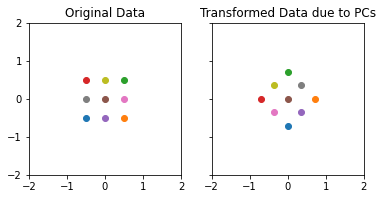

In [40]:
fig2, (ax, ax2) = plt.subplots(ncols=2, sharey=True)
ax.plot(X1[0],X1[1],'o')
ax.plot(X2[0],X2[1],'o')
ax.plot(X3[0],X3[1],'o')
ax.plot(X4[0],X4[1],'o')
ax.plot(X12[0],X12[1],'o')
ax.plot(X13[0],X13[1],'o')
ax.plot(X23[0],X23[1],'o')
ax.plot(X14[0],X14[1],'o')
ax.plot(X34[0],X34[1],'o')

ax2.plot(X1_new[0],X1_new[1],'o')
ax2.plot(X2_new[0],X2_new[1],'o')
ax2.plot(X3_new[0],X3_new[1],'o')
ax2.plot(X4_new[0],X4_new[1],'o')
ax2.plot(X12_new[0],X12_new[1],'o')
ax2.plot(X13_new[0],X13_new[1],'o')
ax2.plot(X14_new[0],X14_new[1],'o')
ax2.plot(X23_new[0],X23_new[1],'o')
ax2.plot(X34_new[0],X34_new[1],'o')

ax.set_title("Original Data")
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax2.set_title("Transformed Data due to PCs")
ax2.set_xlim(-2, 2)
ax2.set_ylim(-2, 2)
ax.set_box_aspect(1)
ax2.set_box_aspect(1)
plt.show()


# Outer product in numpy

In [41]:
import numpy as np
U = np.array([1,1,1,1])
V = np.array([1,1,1,1])
UT = np.transpose(U)
VT = np.transpose(V)
#UV = np.outer(U,V)
UV = np.matmul(UT,V)
#print(U)
#print(V)
print(UV)

4


In [42]:
rankUV = np.linalg.matrix_rank(UV)
print(rankUV)
rankUV = np.linalg.matrix_rank(U)
print(rankUV)

1
1
